Section 1: Data Preparation and Exploration
In this section, we import necessary libraries, load the dataset, perform initial exploration, handle missing values, and visualize the dataset to gain insights.

DRIVING_EXPERIENCE     10000
INCOME                 10000
CREDIT_SCORE             982
VEHICLE_OWNERSHIP          0
VEHICLE_YEAR           10000
MARRIED                    0
CHILDREN                   0
ANNUAL_MILEAGE             0
SPEEDING_VIOLATIONS        0
DUIS                       0
PAST_ACCIDENTS             0
OUTCOME                    0
dtype: int64


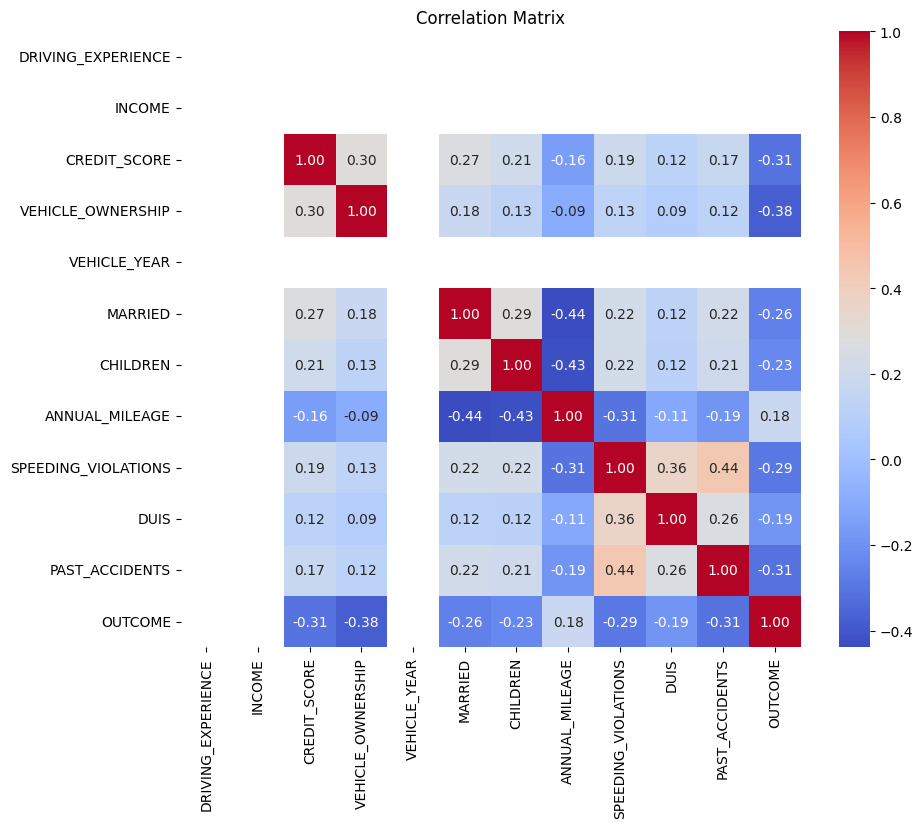

/var/folders/2y/9wbng44n0gd0wzly39wrhxzm0000gn/T/ipykernel_95208/1725945874.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=insurance_claims, y ='OUTCOME',palette='Set1');


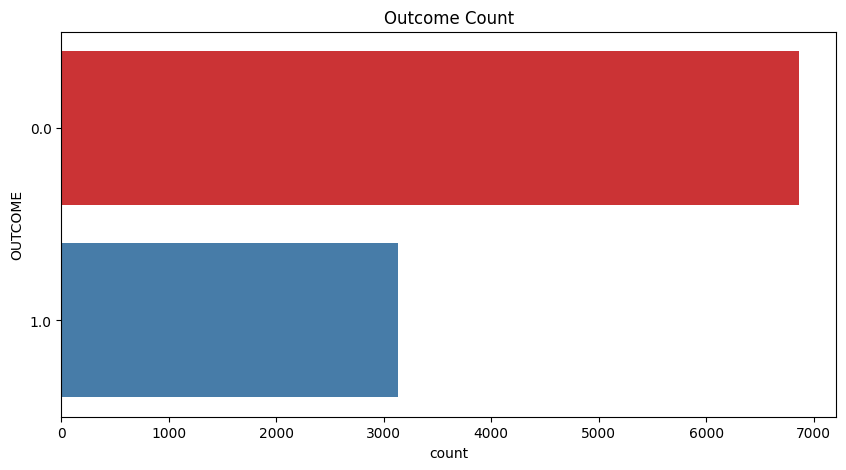

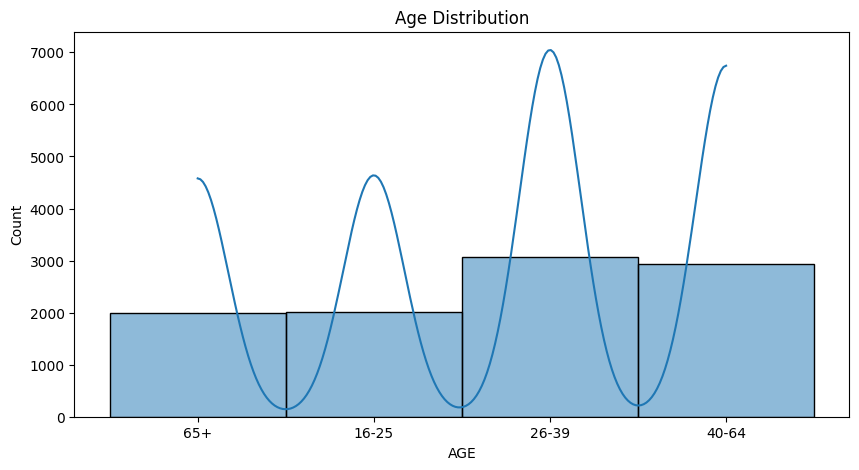

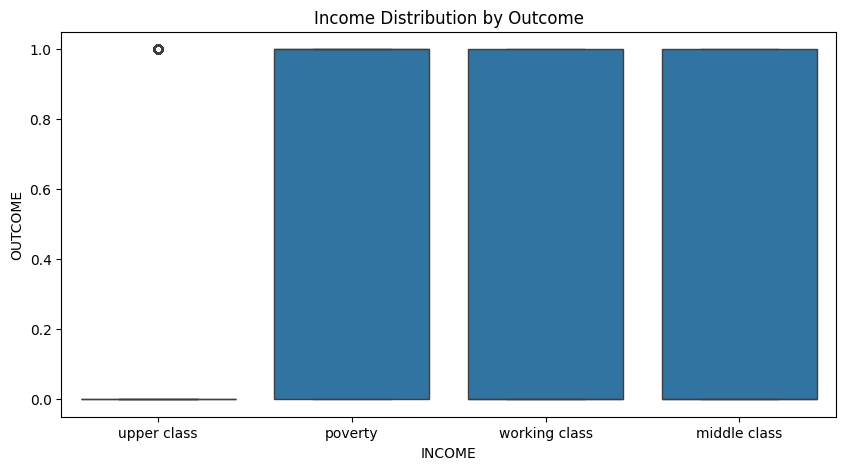

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the dataset
insurance_claims = pd.read_csv('Car_Insurance_Claim.csv')

# Check for null values
insurance_claims.isnull().sum()

# Fill missing values with appropriate strategy
insurance_claims['ANNUAL_MILEAGE'] = insurance_claims['ANNUAL_MILEAGE'].fillna(insurance_claims['ANNUAL_MILEAGE'].median())

# Drop non-numeric columns
numeric_claims = insurance_claims.drop(['ID', 'AGE', 'GENDER', 'RACE', 'EDUCATION', 'POSTAL_CODE', 'VEHICLE_TYPE'], axis=1)

# Convert remaining columns to numeric
numeric_claims = numeric_claims.apply(pd.to_numeric, errors='coerce')

# Check for null values after conversion
print(numeric_claims.isnull().sum())

# Fill NaN values with median
numeric_claims = numeric_claims.fillna(numeric_claims.median())

# Compute correlation matrix
corr = numeric_claims.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Perform exploratory data analysis
plt.figure(figsize=(10,5))
plt.title('Outcome Count')
sns.countplot(data=insurance_claims, y ='OUTCOME',palette='Set1');
# More exploratory data analysis and visualization...
# Visualize distribution of age
plt.figure(figsize=(10,5))
plt.title('Age Distribution')
sns.histplot(data=insurance_claims, x='AGE', bins=30, kde=True);

# Visualize income distribution by outcome
plt.figure(figsize=(10,5))
plt.title('Income Distribution by Outcome')
sns.boxplot(data=insurance_claims, x='INCOME', y='OUTCOME');


Section 2: Data Preprocessing and Feature Engineering
In this section, we preprocess the data by handling categorical variables using one-hot encoding and splitting the data into training and testing sets.

In [2]:
# Perform one-hot encoding for categorical variables
X = insurance_claims.drop(['OUTCOME', 'ID', 'POSTAL_CODE', 'VEHICLE_TYPE'], axis=1)
y = insurance_claims['OUTCOME']
X = pd.get_dummies(X, drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)


In [3]:
from sklearn.impute import SimpleImputer

# Define and apply imputer
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


Section 3: Model Training and Evaluation - Random Forest
In this section, we train a Random Forest classifier, evaluate its performance, and visualize the results.

Text(0, 0.5, 'Features')

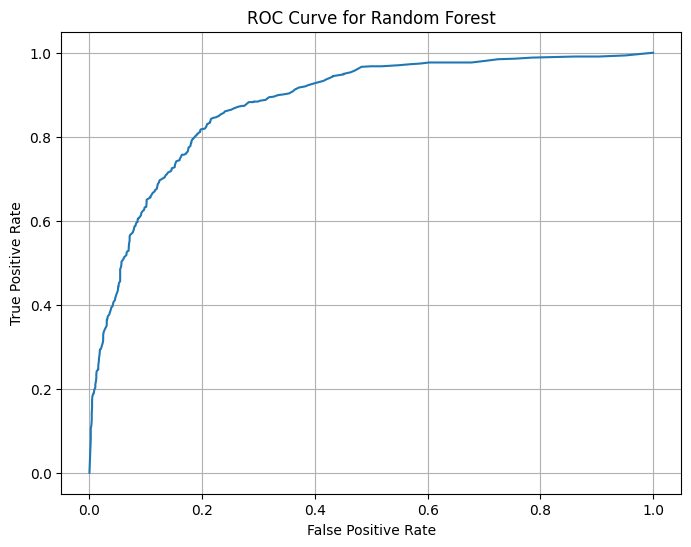

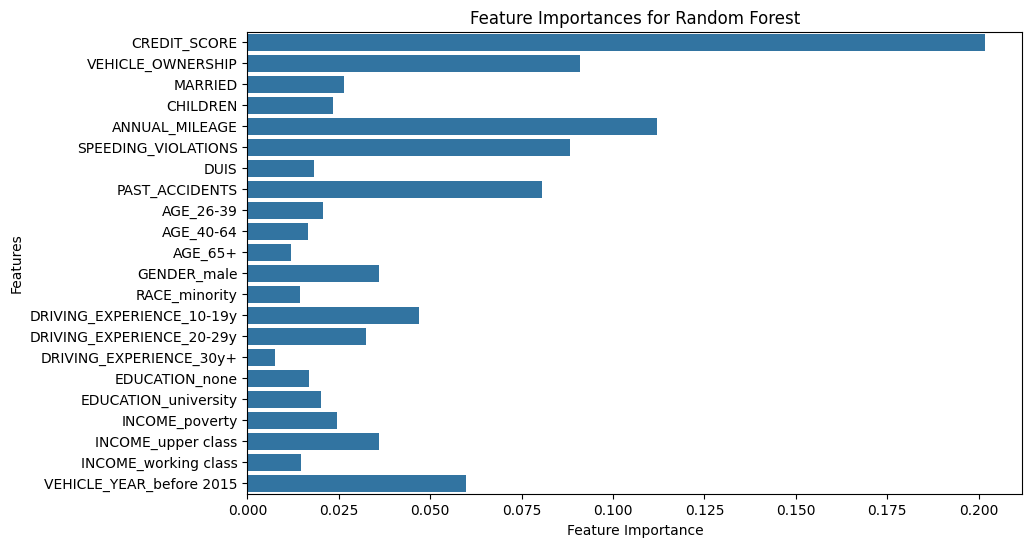

In [4]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

# Train Random Forest model
RF_model = RandomForestClassifier(n_estimators=200)
RF_model.fit(X_train, y_train)

# Make predictions
RF_prediction = RF_model.predict(X_test)

# Evaluate performance
RF_accuracy = metrics.accuracy_score(y_true=y_test,y_pred=RF_prediction)
RF_precision = metrics.precision_score(y_true=y_test,y_pred=RF_prediction)
RF_recall = metrics.recall_score(y_true=y_test,y_pred=RF_prediction)
RF_F1_score = metrics.f1_score(y_true=y_test,y_pred=RF_prediction)
RF_confusion_matrix = confusion_matrix(y_test,RF_prediction)
RF_prob_a = RF_model.predict_proba(X_test)[::,1]
specifities,sensibilities,_=metrics.roc_curve(y_test,RF_prob_a)
auc=metrics.auc(specifities,sensibilities)

# Visualize results

# Visualize ROC curve
plt.figure(figsize=(8,6))
plt.plot(specifities,sensibilities)
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# Visualize feature importances
plt.figure(figsize=(10,6))
plt.title('Feature Importances for Random Forest')
sns.barplot(x=RF_model.feature_importances_, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')


Section 4: Model Training and Evaluation - Logistic Regression
In this section, we train a Logistic Regression classifier, evaluate its performance, and visualize the results.

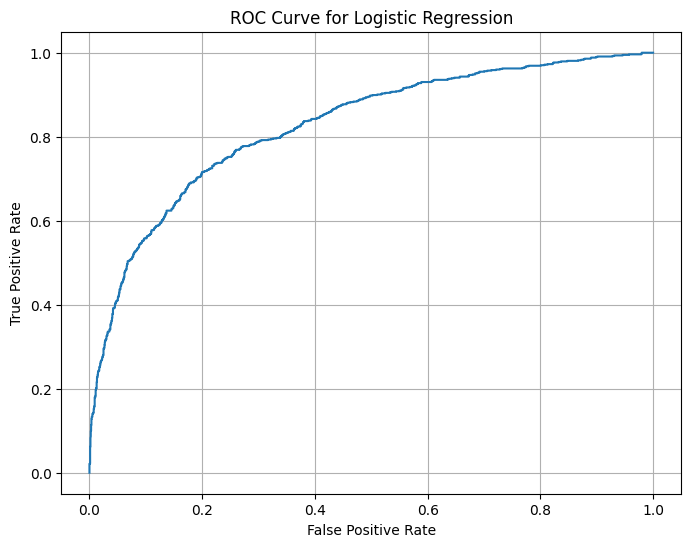

In [5]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(X_train, y_train)

# Make predictions
LR_prediction = LR_model.predict(X_test)

# Evaluate performance
LR_accuracy = metrics.accuracy_score(y_true=y_test,y_pred=LR_prediction)
LR_precision = metrics.precision_score(y_true=y_test,y_pred=LR_prediction)
LR_recall = metrics.recall_score(y_true=y_test,y_pred=LR_prediction)
LR_F1_score = metrics.f1_score(y_true=y_test,y_pred=LR_prediction)
LR_confusion_matrix = confusion_matrix(y_test,LR_prediction)
LR_prob_a = LR_model.predict_proba(X_test)[::,1]
specifities,sensibilities,_=metrics.roc_curve(y_test,LR_prob_a)
auc=metrics.auc(specifities,sensibilities)

# Visualize results
# Visualize ROC curve
plt.figure(figsize=(8,6))
plt.plot(specifities,sensibilities)
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)


Section 5: Model Training and Evaluation - Other Models
In this section, we train and evaluate additional classification models such as KNN and SVM, and compare their performance with previously trained models.

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


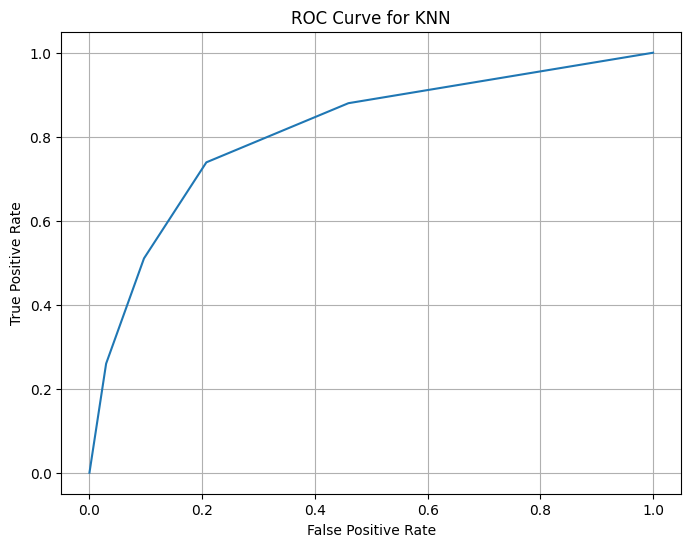

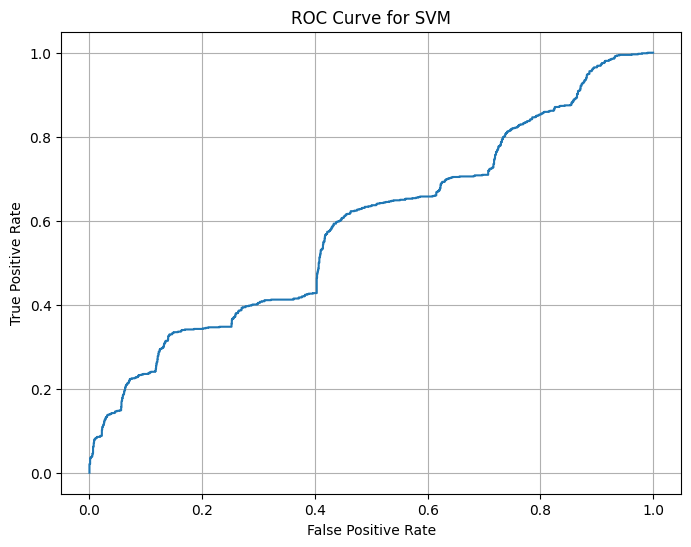

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Train KNN model
KNN_model = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)

# Make predictions
KNN_prediction = KNN_model.predict(X_test)

# Evaluate performance
# Visualize results

# Train SVM model
SVM_model = SVC(kernel = 'rbf', random_state = 0)
SVM_model.fit(X_train, y_train)

# Make predictions
SVM_prediction = SVM_model.predict(X_test)

# Train KNN model
KNN_model = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)

# Make predictions
KNN_prediction = KNN_model.predict(X_test)

# Evaluate performance
KNN_accuracy = metrics.accuracy_score(y_true=y_test,y_pred=KNN_prediction)
KNN_precision = metrics.precision_score(y_true=y_test,y_pred=KNN_prediction)
KNN_recall = metrics.recall_score(y_true=y_test,y_pred=KNN_prediction)
KNN_F1_score = metrics.f1_score(y_true=y_test,y_pred=KNN_prediction)
KNN_confusion_matrix = confusion_matrix(y_test,KNN_prediction)
KNN_prob_a = KNN_model.predict_proba(X_test)[::,1]
specifities,sensibilities,_=metrics.roc_curve(y_test,KNN_prob_a)
auc=metrics.auc(specifities,sensibilities)

# Visualize ROC curve
plt.figure(figsize=(8,6))
plt.plot(specifities,sensibilities)
plt.title('ROC Curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# More visualizations...

# Train SVM model
SVM_model = SVC(kernel = 'rbf', random_state = 0, probability=True)
SVM_model.fit(X_train, y_train)

# Make predictions
SVM_prediction = SVM_model.predict(X_test)

# Evaluate performance
SVM_accuracy = metrics.accuracy_score(y_true=y_test,y_pred=SVM_prediction)
SVM_precision = metrics.precision_score(y_true=y_test,y_pred=SVM_prediction)
SVM_recall = metrics.recall_score(y_true=y_test,y_pred=SVM_prediction)
SVM_F1_score = metrics.f1_score(y_true=y_test,y_pred=SVM_prediction)
SVM_confusion_matrix = confusion_matrix(y_test,SVM_prediction)
SVM_prob_a = SVM_model.predict_proba(X_test)[::,1]
specifities,sensibilities,_=metrics.roc_curve(y_test,SVM_prob_a)
auc=metrics.auc(specifities,sensibilities)

# Visualize ROC curve
plt.figure(figsize=(8,6))
plt.plot(specifities,sensibilities)
plt.title('ROC Curve for SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)



#compare the performance of all models

Comparison of Model Performances:

Random Forest Accuracy:  0.8192
Logistic Regression Accuracy:  0.7904
KNN Accuracy:  0.7816
SVM Accuracy:  0.6904


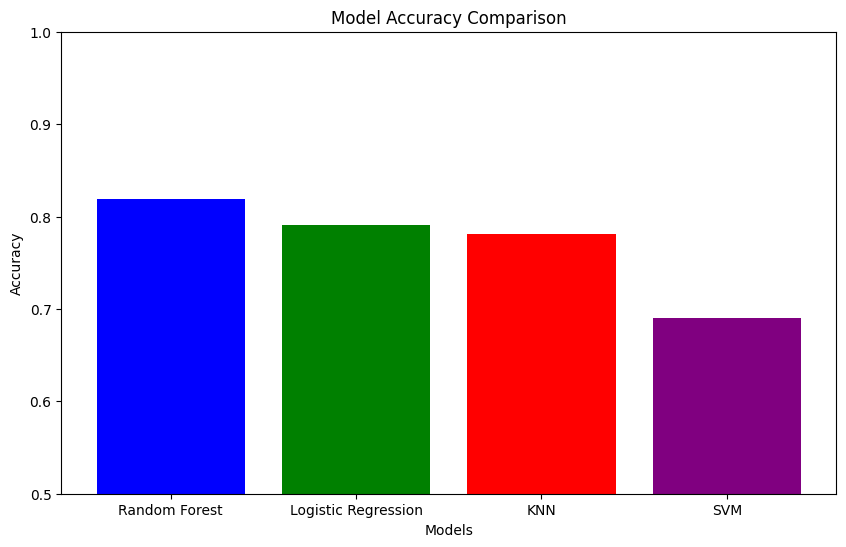

In [7]:
# Compare performance of all models
print("Comparison of Model Performances:\n")
print("Random Forest Accuracy: ", RF_accuracy)
print("Logistic Regression Accuracy: ", LR_accuracy)
print("KNN Accuracy: ", KNN_accuracy)
print("SVM Accuracy: ", SVM_accuracy)

# Plotting comparison
plt.figure(figsize=(10,6))
models = ['Random Forest', 'Logistic Regression', 'KNN', 'SVM']
accuracies = [RF_accuracy, LR_accuracy, KNN_accuracy, SVM_accuracy]
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.show()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
Unique classes in target variable: [0 2 1]


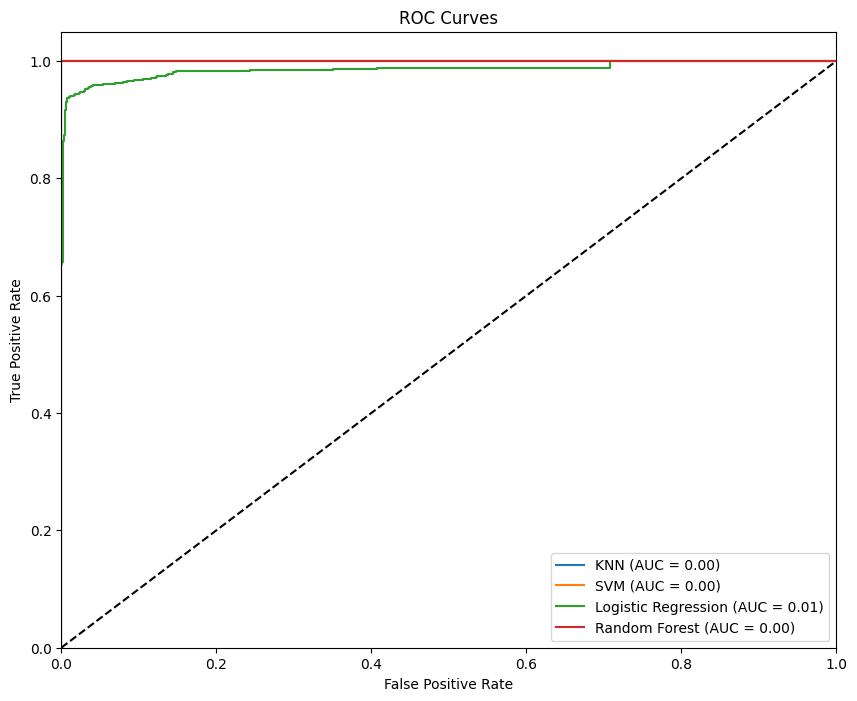

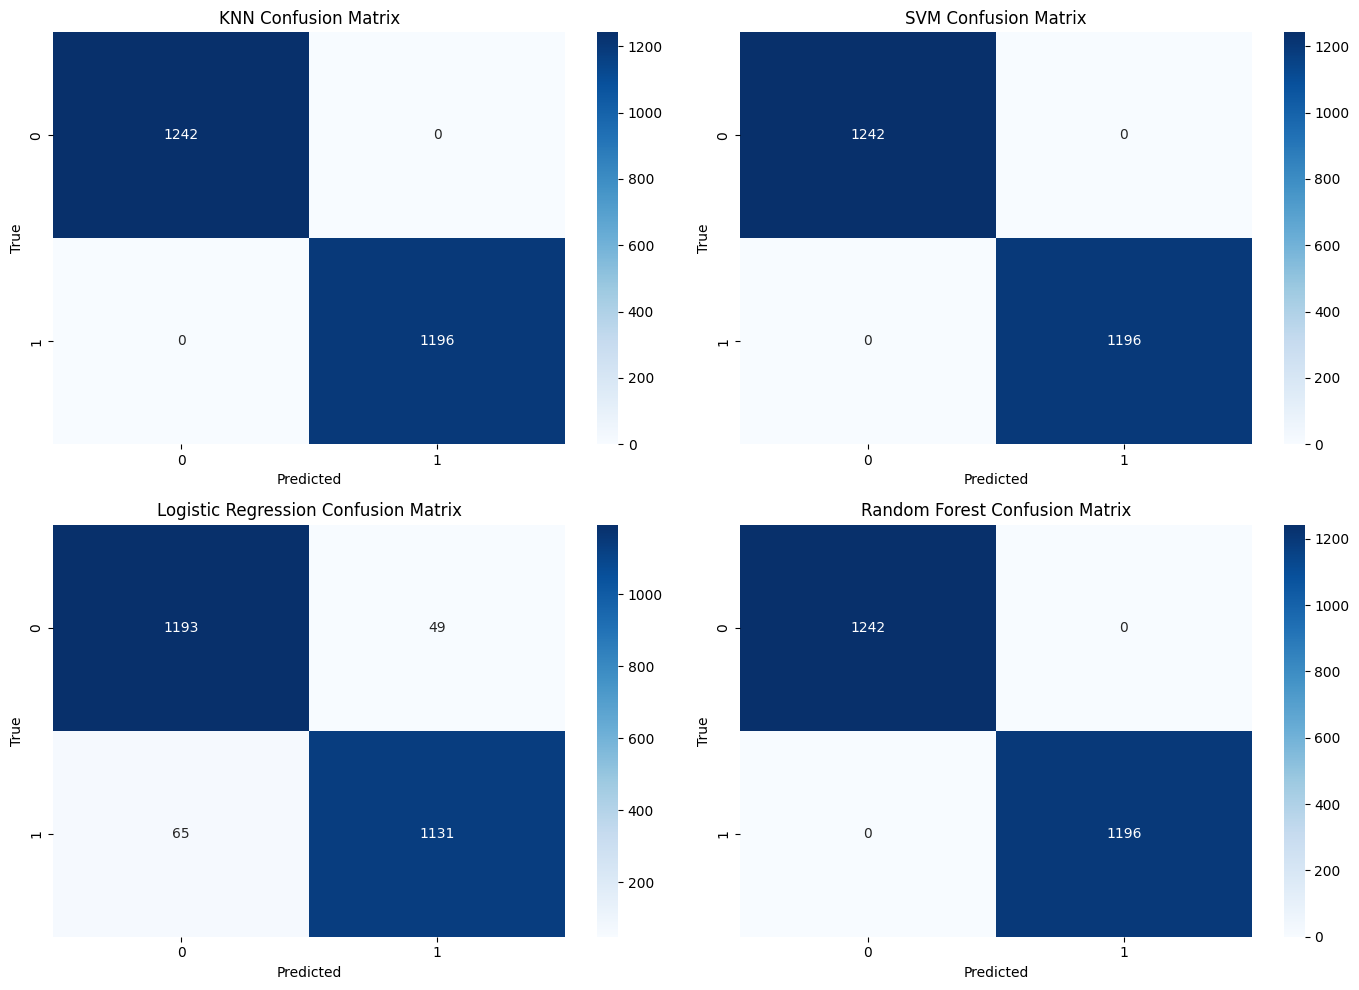

KNN Accuracy: 1.00
KNN Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1242
           2       1.00      1.00      1.00      1196

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


SVM Accuracy: 1.00
SVM Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1242
           2       1.00      1.00      1.00      1196

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Logistic Regression Accuracy: 0.95
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.96      0.95      1242
           2       0.96      0.95      0.95      1196

    accura

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define column names
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
    'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

# Load the dataset
data = pd.read_csv('mushrooms.csv', header=None, names=column_names)

# Encode the categorical variables
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

# Verify no missing values
print(data.isnull().sum())

# Split the dataset into features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Ensure the target variable is binary (already in the form of 0 and 1 after LabelEncoder)
unique_classes = y.unique()
print(f"Unique classes in target variable: {unique_classes}")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier()
}

# Train models, make predictions, and evaluate
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]  # Probability for the positive class
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    results[name] = {
        'accuracy': accuracy,
        'conf_matrix': conf_matrix,
        'class_report': class_report,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc
    }

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, result in results.items():
    plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()
for i, (name, result) in enumerate(results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
plt.tight_layout()
plt.show()

# Print accuracy scores and classification reports
for name, result in results.items():
    print(f'{name} Accuracy: {result["accuracy"]:.2f}')
    print(f'{name} Classification Report:\n{result["class_report"]}\n')
